#Retail Strategy and Analytics - Task 2

Let load the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df = pd.read_csv('C:/Users/User/Documents/Quatum Intenship/Task1/Customer_Data.csv')

In [3]:
df= df.drop('Unnamed: 0',axis=1)


In [4]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


Adding Month name to dataset

In [5]:
df['MONTH']= pd.to_datetime(df['DATE']).dt.month_name()
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,October
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,May
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget,November
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,March
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,May


## Select control stores
The client has selected store numbers 77, 86 and 88 as trial stores and want
control stores to be established stores that are operational for the entire
observation period.


Control Store

In [6]:
option = [77,86,88]
cstore = df[df['STORE_NBR'].isin(option)]
cstore.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
253,2019-05-20,88,88320,87811,113,Twisties Chicken270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,May
254,2018-07-07,88,88320,87804,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos,MIDAGE SINGLES/COUPLES,Budget,July
255,2018-07-16,88,88320,87805,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,July
256,2018-09-29,88,88320,87807,74,Tostitos Splash Of Lime 175g,2,8.8,175,Tostitos,MIDAGE SINGLES/COUPLES,Budget,September
257,2018-10-29,88,88320,87808,90,Tostitos Smoked Chipotle 175g,2,8.8,175,Tostitos,MIDAGE SINGLES/COUPLES,Budget,October


We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of:
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer


This trial store

In [7]:
cstore['DATE'] = pd.to_datetime(cstore['DATE'],format='%Y-%m-%d')
tstore = cstore.loc[(cstore['DATE'] <'2019-01-31')]
tstore.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
254,2018-07-07,88,88320,87804,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos,MIDAGE SINGLES/COUPLES,Budget,July
255,2018-07-16,88,88320,87805,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,July
256,2018-09-29,88,88320,87807,74,Tostitos Splash Of Lime 175g,2,8.8,175,Tostitos,MIDAGE SINGLES/COUPLES,Budget,September
257,2018-10-29,88,88320,87808,90,Tostitos Smoked Chipotle 175g,2,8.8,175,Tostitos,MIDAGE SINGLES/COUPLES,Budget,October
1775,2018-09-26,77,77000,74910,36,Kettle Chilli 175g,2,10.8,175,Kettle,MIDAGE SINGLES/COUPLES,Budget,September


We need to filter the pre-trial period before 2019-02

For each store and month calculate total sales, number of customers,
transactions per customer, chips per customer and the average price per unit.

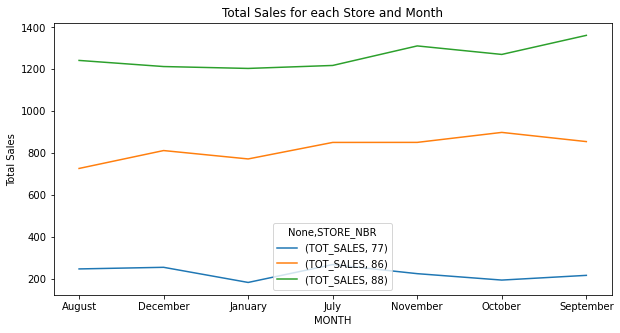

In [8]:
# We define each store monthly sales by tm
tm = tstore[['STORE_NBR','MONTH','TOT_SALES']]
tmg= tm.groupby(['MONTH','STORE_NBR'], as_index=False).sum()
tmp = tmg.pivot(index='MONTH',columns='STORE_NBR')
ko = tmp.plot.line(figsize=(10, 5))
ko.set(ylabel='Total Sales',title='Total Sales for each Store and Month')
plt.show()


Store 77 has total number of 297
Store 86 has total number of 828
Store 88 has total number of 1027


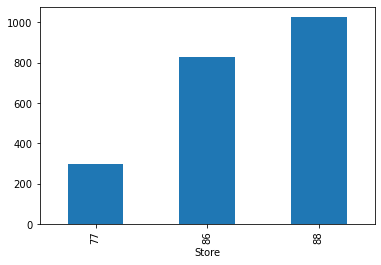

In [9]:
# We are finding our total customer by each store
tm = tstore['STORE_NBR']
tp= pd.Categorical(tm).value_counts()
tp.plot(kind='bar')
plt.xlabel('Store')
def ite(val):
    for key, value in val.items():
        print('Store', key, 'has total number of', value)
ite(tp)


In [10]:
# transaction per customer
tc = pd.Categorical(tstore['TXN_ID'])
tc.value_counts().sum()
# The total transaction per customer is 2152

2152

BRAND     
Kettle        410
Pringles      222
Smiths        195
Doritos       180
Thins         142
RRD           117
Cobs           96
Infuzions      93
Tostitos       92
Twisties       89
WW             81
Tyrrells       66
Natural        55
Grain          54
Infzns         46
Cheezels       38
CCs            32
Smith          26
Dorito         25
Cheetos        23
French         15
Snbts          11
Burger         11
Woolworths     10
Sunbites       10
GrnWves         8
NCC             5
dtype: int64


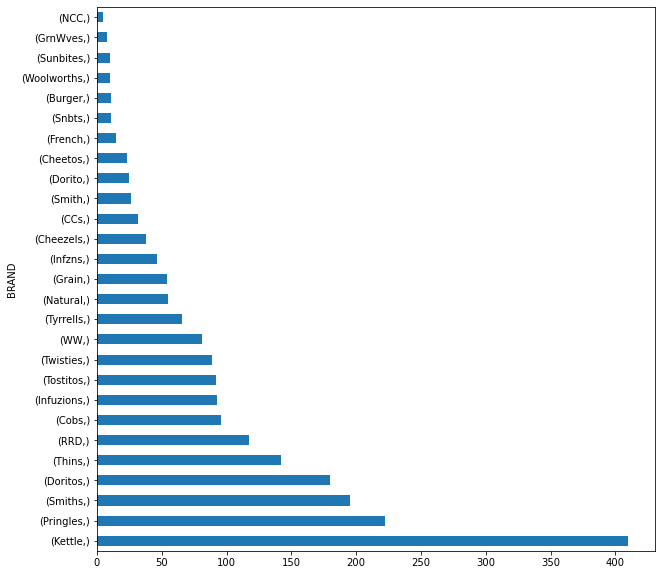

In [11]:
# chips per transaction
ii = tstore[['TXN_ID','BRAND']]
ii=ii.set_index('TXN_ID')
ik= ii.value_counts()
ik.plot(kind='barh', figsize=(10, 10))
print(ik)

   PROD_QTY  TOT_SALES
0         1   3.713243
1         2   7.848239
2         3  11.550000
3         4  20.200000
4         5  15.250000


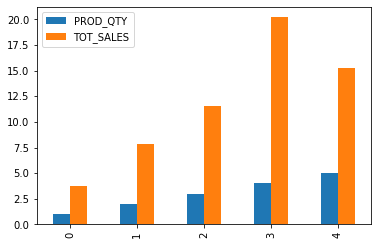

In [12]:
# Average price per transaction by order
avpg = tstore[['PROD_QTY','TOT_SALES']]
avgp = avpg.groupby(['PROD_QTY'], as_index=False).mean()
avgp.plot(kind='bar')
print(avgp)

Finding the correlation between control store (cstore) and trial store (tstore)
- we will be measuring their correlation based on their Total Sales, Production  Quantiity

               Control Store  Trial Store
Control Store            1.0          1.0
Trial Store              1.0          1.0


<AxesSubplot:>

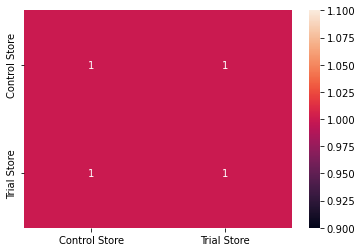

In [13]:
# Let shape control store(cstore) to the measure of our trial store
ca = cstore[:2152]
# let create metrics of correlation by their total sales
kc = pd.DataFrame()
kc['Control Store'] = ca['TOT_SALES']
kc['Trial Store'] = tstore['TOT_SALES']
kk= kc.corr()
print(kk)

sns.heatmap(kk,annot=True)

               Control Store  Trial Store
Control Store            1.0          1.0
Trial Store              1.0          1.0


<AxesSubplot:>

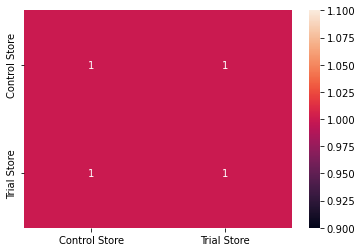

In [14]:
# Let measure it by production
pq = pd.DataFrame()
pq['Control Store'] = ca['PROD_QTY']
pq['Trial Store'] = tstore['PROD_QTY']
pp = kc.corr()
print(pp)

sns.heatmap(pp,annot=True)

We are calculating control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores.
- So we will need to use our functions to get four scores, two for each of total sales and total customers.

Calculating correlations against
store 77 using total sales and number of customers.

In [15]:
store77 = cstore[cstore['STORE_NBR']==77]
store77.head()



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
767,2019-06-17,77,77069,74987,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,Tyrrells,MIDAGE SINGLES/COUPLES,Budget,June
768,2019-02-20,77,77069,74985,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175,NCC,MIDAGE SINGLES/COUPLES,Budget,February
769,2019-03-08,77,77069,74986,8,Smiths Crinkle Cut Chips Original 170g,2,5.8,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,March
1773,2019-03-28,77,77000,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,Cheetos,MIDAGE SINGLES/COUPLES,Budget,March
1774,2019-04-13,77,77000,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,April


Calculating Corrlation in store 77 between total sales and number of customers to trial store

           TOT_SALES
MONTH               
June             8.4
February         6.0
March            5.8
March            3.3
April            3.0
...              ...
July             3.8
July             5.2
November         4.2
September        3.8
November         3.8

[529 rows x 1 columns]
We can see we have high sales between june and February


<AxesSubplot:xlabel='MONTH'>

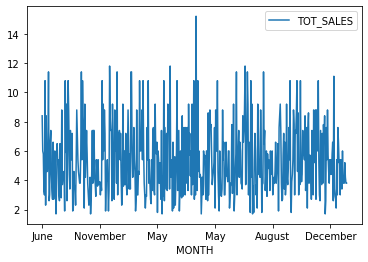

In [70]:
tm = store77[['MONTH','TOT_SALES']]
t1 = tm.set_index('MONTH')
print(t1)
print('We can see we have high sales between june and February')
t1.plot()

In [71]:
import scipy.stats as stats
# Let use anova to calculate the differenc
ano = stats.f_oneway(tm['TOT_SALES'][tm['MONTH']=='June'],tm['TOT_SALES'][tm['MONTH']=='February'])
ano

F_onewayResult(statistic=3.7711770964724836, pvalue=0.05580049145687446)

- Result of the analysis indicated that that there is statistical differnce between total sales in June and February
- Where F=3.77 and pvalue = 0.56

# Let check for brands they are purchasing the most both control store and trial store

The most selling brand is kettle chips


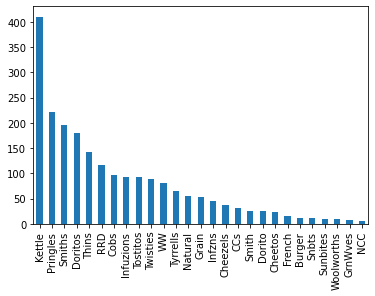

In [ ]:
# Let check for brands they are purchasing the most in trial store
tstore['BRAND'].value_counts().plot(kind='bar')
print('The most selling brand is kettle chips')

<AxesSubplot:>

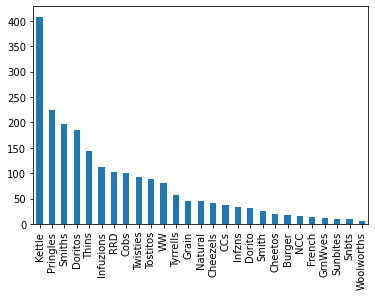

In [ ]:
ca['BRAND'].value_counts().plot(kind='bar')


Let find the difference between brands and their effect on price

let check relationship between these two store

In [73]:
jj = stats.f_oneway(tstore['TOT_SALES'][tstore['BRAND'] ==
                    'Kettle'], ca['TOT_SALES'][ca['BRAND'] == 'Kettle'])
jj


F_onewayResult(statistic=0.045816476258425776, pvalue=0.8305632269795589)

We can see from the result that there is no difference between the groups since p>0.05

In [79]:
tstore.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
254,2018-07-07,88,88320,87804,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos,MIDAGE SINGLES/COUPLES,Budget,July
255,2018-07-16,88,88320,87805,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,July
256,2018-09-29,88,88320,87807,74,Tostitos Splash Of Lime 175g,2,8.8,175,Tostitos,MIDAGE SINGLES/COUPLES,Budget,September
257,2018-10-29,88,88320,87808,90,Tostitos Smoked Chipotle 175g,2,8.8,175,Tostitos,MIDAGE SINGLES/COUPLES,Budget,October
1775,2018-09-26,77,77000,74910,36,Kettle Chilli 175g,2,10.8,175,Kettle,MIDAGE SINGLES/COUPLES,Budget,September


# Let find correlation between each variable in each store

In [77]:
# Control Store
cstore.corr()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Pack_Size
STORE_NBR,1.000000,-0.104941,0.063506,-0.037314,0.468720,0.439504,0.015014
LYLTY_CARD_NBR,-0.104941,1.000000,0.347484,-0.002195,-0.063127,-0.016536,0.017000
TXN_ID,0.063506,0.347484,1.000000,0.019358,0.024856,0.051542,0.006463
PROD_NBR,-0.037314,-0.002195,0.019358,1.000000,-0.026304,-0.175700,-0.256321
PROD_QTY,0.468720,-0.063127,0.024856,-0.026304,1.000000,0.519530,-0.031392
TOT_SALES,0.439504,-0.016536,0.051542,-0.175700,0.519530,1.000000,0.409913
Pack_Size,0.015014,0.017000,0.006463,-0.256321,-0.031392,0.409913,1.000000


Result from the  table above shows that
- there is 51.9% relationship between product quantity and total Sales.
- there is 40% relationship between pack size and total Sales

In [78]:
# Trial Store
tstore.corr()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Pack_Size
STORE_NBR,1.000000,-0.113720,0.044585,-0.030786,0.510827,0.434820,-0.002485
LYLTY_CARD_NBR,-0.113720,1.000000,0.321903,-0.005472,-0.076769,-0.013573,0.030607
TXN_ID,0.044585,0.321903,1.000000,0.025673,0.016712,0.053629,0.011791
PROD_NBR,-0.030786,-0.005472,0.025673,1.000000,-0.021832,-0.141911,-0.234515
PROD_QTY,0.510827,-0.076769,0.016712,-0.021832,1.000000,0.524481,-0.019214
TOT_SALES,0.434820,-0.013573,0.053629,-0.141911,0.524481,1.000000,0.400275
Pack_Size,-0.002485,0.030607,0.011791,-0.234515,-0.019214,0.400275,1.000000


Result from the  table above shows that
- there is 52.4% relationship between product quantity and total Sales.
- there is 40% relationship between pack size and total Sales

Result from the two table above shows that there is similar buying pattern among the two stores